### Q3 lab03 max Fine

In [194]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from gaussxw import *




a) Write a user-defined function H(n,x) that calculates Hn(x) for given x and any integer n ≥ 0.
Use your function to make a plot that shows the harmonic oscillator wavefunctions for n = 0, 1,
2, and 3, all on the same graph, in the range −4 ≤ x ≤ 4.

In [205]:
def hermite(n,x):
    '''calculates hermite polynomials'''
    
    '''2xhn = '''
    #n += 1 
   # print(n)
   # print('n input is ',n)
    
    # check if x is a single or a array
    
    #print(n)
    
    try:
        h0 = np.ones(len(x))
    except:
        h0 = 1
        
        # if x is a single value return a single, 
        # if array like should be ones of size of the array
        
    h1 = 2*x
    
    if n == 0:
        return h0
    
    if n == 1:
        return h1
    
    #n += 1
    for i in range(1,n+1):
        # i should start at 2 and go until n
        #nth-1 = ni + ni-1
        #print('n is ',i)
        hn = 2*x*h1 - 2*i*h0
        
        #print(i==n-1)
        if i == n-1:
            #print(i-1)
            return hn
        
        # update values
        h0 = h1
        h1 = hn
        
        ##print(i==n-1)
        #if i == n-1:
         #   return hn
        

def psi(n,x):
    '''calculates Hn(x) for given x and any integer n ≥ 0
    for Quantum haromic oscilator'''
    
    psi = (1/ np.sqrt(2**n *factorial(n) * \
                      np.sqrt(np.pi)))*np.exp(-0.5*x**2)
    
    h_nx = hermite(n,x)
    
    return h_nx * psi


    

In [206]:
# functions
def quad(f, N,a,b, n):
    x,w = gaussxwab(N,a,b)
    s = 0.0
    for k in range(N):
        s += w[k]*f(n,x[k]) 
    return s

# functions for psi, psi_prime, x_2_integrand, p_2_integrand for the substition of tan(z) = x

def psi_z(n,z):
    
    psi = (1/ np.sqrt(2**n *factorial(n) * \
                      np.sqrt(np.pi)))*np.exp(-0.5*np.tan(z)**2)
    
    return psi*hermite(n,np.tan(z))

def x2_integrand(n,z):
    return (np.tan(z)**2/np.cos(z)**2)*np.abs(psi_z(n,z))**2
    

def psi_prime(n,z):
    psi = (1/ np.sqrt(2**n *factorial(n) * \
                      np.sqrt(np.pi)))*np.exp(-0.5*np.tan(z)**2)
    
    return psi*(-np.tan(z) * hermite(n,np.tan(z)) + 2 * n * H(n-1,np.tan(z)))

def p2_integrand(n,z):
    
    # for n==0, the prime breaks, so we must do it another way
    if n==0:

        return x2_integrand(n,z)
        # this trick works based on our answer to Q3C
    
    else:
        return (1/np.cos(z)**2)* np.abs(psi_prime(n,z))**2


In [136]:


# new functions


def psi_z(n,z):
    c = (np.sqrt(float(2**n)*float(factorial(n))*np.sqrt(np.pi)))**-1*np.exp(-0.5*np.tan(z)**2)
    return c*hermite(n,np.tan(z))

def dpsi_z(n,z):
    c = (np.sqrt(float(2**n)*float(factorial(n))*np.sqrt(np.pi)))**-1*np.exp(-0.5*np.tan(z)**2)
    return c*(-np.tan(z)*hermite(n,np.tan(z))+2*n*H(n-1,np.tan(z)))

def pos_integrand(n,z):
    return (np.tan(z)**2/np.cos(z)**2)*np.abs(psi_z(n,z))**2

def p_integrand(n,z):
    
    if n==0:
        return pos_integrand(n,z)
    
    else:
        return (1/np.cos(z)**2)* np.abs(dpsi_z(n,z))**2


def quad(f, N,a,b, n):
    x,w = gaussxwab(N,a,b)
    s = 0.0
    for k in range(N):
        s += w[k]*f(n,x[k]) # can i make this faster with numpy?
    #print(f'Integral by Gaussianquadrature method (n = {n})= ', s) # remove print statment
    return s

In [3]:
x = np.linspace(-4,4,50)

expect_x2(x,5)


(16.26732912948457, 1.2503822756309468e-07)

(-30.0, 30.0)

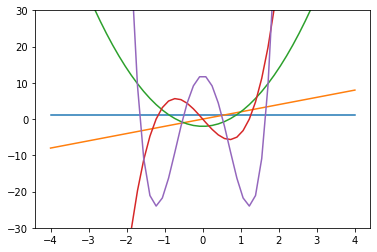

In [214]:

h0 = np.ones(len(x))
h1 = 2*x
h2 = 4*x**2 -2
h3 = 8*x**3 - 12*x
h4 = 16*x**4 -48*x**2 + 12

plt.plot(x,h0)
plt.plot(x,h1)
plt.plot(x,h2)
plt.plot(x,h3)
plt.plot(x,h4)
plt.ylim(-30,30)

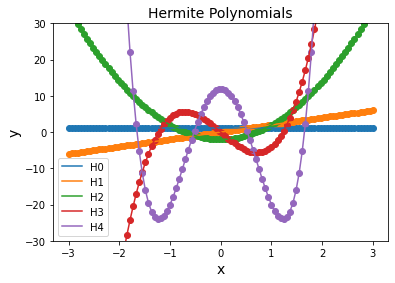

In [208]:
x = np.linspace(-4,4)
h0 = np.ones(len(x))
h1 = 2*x
h2 = 4*x**2 -2
h3 = 8*x**3 - 12*x
h4 = 16*x**4 -48*x**2 + 12

plt.scatter(x,h0)
plt.scatter(x,h1)
plt.scatter(x,h2)
plt.scatter(x,h3)
plt.scatter(x,h4)
plt.ylim(-30,30)
n = 4

for i in range(n+1):

    yi  = hermite(i,x)

    plt.plot(x,yi, label= 'H'+ str(i))

plt.legend()
plt.ylim(-30,30) 
plt.title('Hermite Polynomials', fontsize=fs)
plt.xlabel('x', fontsize=fs)
plt.ylabel('y',fontsize=fs)
plt.savefig('q3_a2.pdf', bbox_inches='tight') # saves plot
plt.closefig() # closes plot to save mem

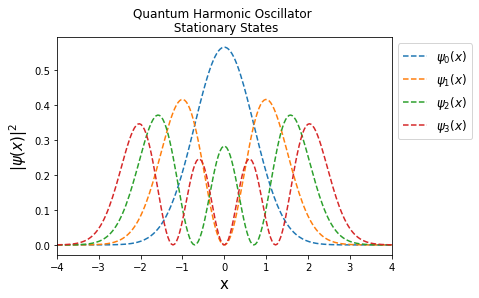

In [209]:
n = 3
fs = 15
x = np.linspace(-4,4,200)
max_yi = 0
#plt.plot(x,x**2, color = 'k', label = "Potential Well")
for i in range(n+1):
    yi = H(i,x)
    
    if max_yi < np.max(np.abs(yi**2)):
        max_yi = np.max(np.abs(yi**2))

    plt.plot(x, np.abs(yi**2), linestyle='--', 
             label ='$\psi_'+str(i)+'(x)$' , )
    

plt.xlim(-4,4)
#plt.ylim(0, max_yi)
plt.ylabel('$|\psi(x)|^2$', fontsize=fs)
plt.xlabel(r'x',fontsize=fs)
plt.legend(fontsize=12, bbox_to_anchor=(1,1))
plt.title('Quantum Harmonic Oscillator \n Stationary States', fontsize =12)
plt.savefig('q3_a.pdf', bbox_inches='tight') # saves plot

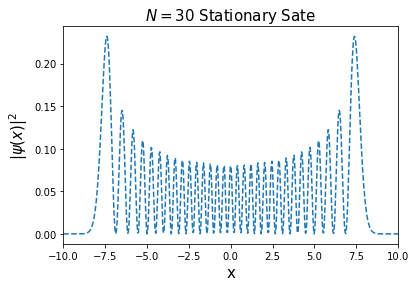

In [210]:
n = 30
x = np.linspace(-10,10, 500)
max_yi = 0
#plt.plot(x,x**2, color = 'k', label = "Potential Well")

yi = H(n,x)
    
if max_yi < np.max(yi):
    max_yi = np.max(yi)

plt.plot(x, np.abs(yi**2), linestyle='--', label ='$H_{'+str(n)+'}(x)$')
    

plt.xlim(-10,10)
#plt.ylim(0, max_yi)
#plt.ylim(0, max_yi)
plt.ylabel('$|\psi(x)|^2$', fontsize=fs)
plt.xlabel(r'x',fontsize=fs)
#plt.legend(fontsize=12)
plt.title('$N=30$ Stationary Sate', fontsize=fs)
plt.savefig('q3_b.pdf', bbox_inches='tight') # saves plot

In [211]:
# init z
z = np.linspace(-np.pi/2 , np.pi/2, 5000)
N = 100
a = z[0]
b = z[-1]
n = 15
n_arr = np.arange(0,n+1,1)
#print('a is')
x_2 = np.empty(n+1)
p_2 = np.empty(n+1)
x = np.empty(n+1)
p = np.empty(n+1)
e = np.empty(n+1)
for i in range(len(n_arr)):
    n = n_arr[i]
    x_2[n] = quad(f=x2_integrand, N=N,a=a,b=b, n=n)
    p_2[n] = quad(f=p2_integrand, N=N,a=a,b=b, n=n)
x = np.sqrt(x_2)
p = np.sqrt(p_2)
e = 0.5 * ( x_2 + p_2)

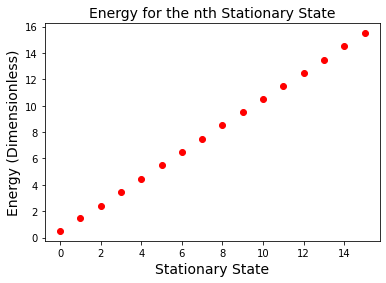

In [212]:
plt.scatter(n_arr, e,color='red')
fs=14
plt.title('Energy for the nth Stationary State', fontsize=fs)
plt.xlabel('Stationary State', fontsize=fs)
plt.ylabel('Energy (Dimensionless)', fontsize=fs)
plt.savefig('q3_c.pdf', bbox_inches='tight') # saves plot

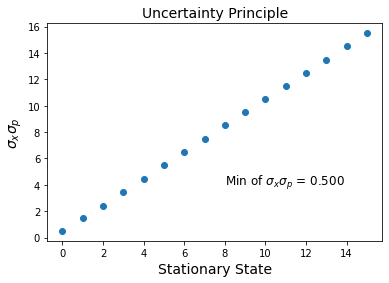

In [213]:
plt.scatter(n_arr, x*p)
plt.xlabel('Stationary State', fontsize=fs)
plt.ylabel('$\sigma_x \sigma_p$', fontsize=fs)
plt.title('Uncertainty Principle', fontsize=fs)
plt.text(x=8, y= 4, s='Min of $\sigma_x \sigma_p$ = '+ str(np.min(x*p))[0:5], fontsize=fs-2)
plt.savefig('q3_c2.pdf', bbox_inches='tight') # saves plot

In [133]:
x_2[5]**0.5 # I am off by 0.3! 

2.3452078797796547

In [124]:
x_2[0]

4.6394201920945e-310

In [203]:
# off by 0.25 for n=1
p_2

array([ 0.5       ,  1.48016264,  2.32072557,  3.37127889,  4.43990721,
        5.47869193,  6.49364776,  7.49830598,  8.49958164,  9.49989915,
       10.49997206, 11.50005716, 12.50026101, 13.49965485, 14.49610179,
       15.49661474])

In [204]:
x_2

array([ 0.5       ,  1.5       ,  2.5       ,  3.5       ,  4.5       ,
        5.5       ,  6.50000001,  7.50000009,  8.49999984,  9.49999639,
       10.49999355, 11.5000617 , 12.50026193, 13.49965503, 14.49610183,
       15.49661474])